# Markevery Demo

This example demonstrates the various options for showing a marker at a subset of data points using the markevery property of a Line2D object.

Integer arguments are fairly intuitive. e.g. markevery=5 will plot every 5th marker starting from the first data point.

Float arguments allow markers to be spaced at approximately equal distances along the line. The theoretical distance along the line between markers is determined by multiplying the display-coordinate distance of the axes bounding-box diagonal by the value of markevery. The data points closest to the theoretical distances will be shown.

A slice or list/array can also be used with markevery to specify the markers to show.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# define a list of markevery cases to plot
cases = [None,
         8,
         (30, 8),
         [16, 24, 30], [0, -1],
         slice(100, 200, 3),
         0.1, 0.3, 1.5,
         (0.0, 0.1), (0.45, 0.1)]

# define the figure size and grid layout properties
figsize = (10, 8)
cols = 3
rows = len(cases) // cols + 1
# define the data for cartesian plots
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta


def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

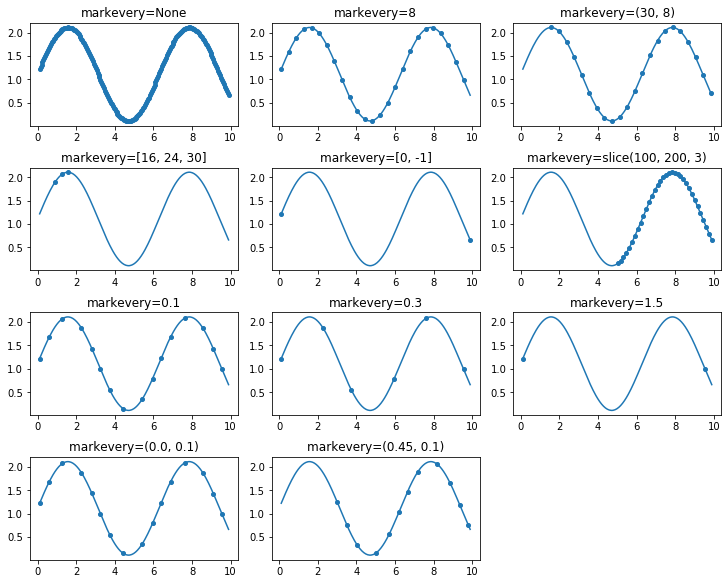

In [3]:
# Plot each markevery case for linear x and y scales
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)

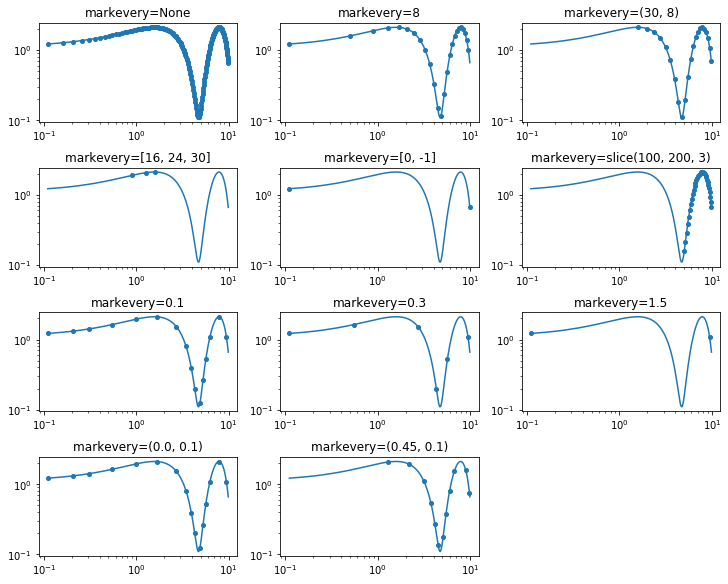

In [4]:
# Plot each markevery case for log x and y scales
fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)

Plot each markevery case for linear x and y scales but zoomed in note the behaviour when zoomed in. When a start marker offset is specified it is always interpreted with respect to the first data point which might be different to the first visible data point.

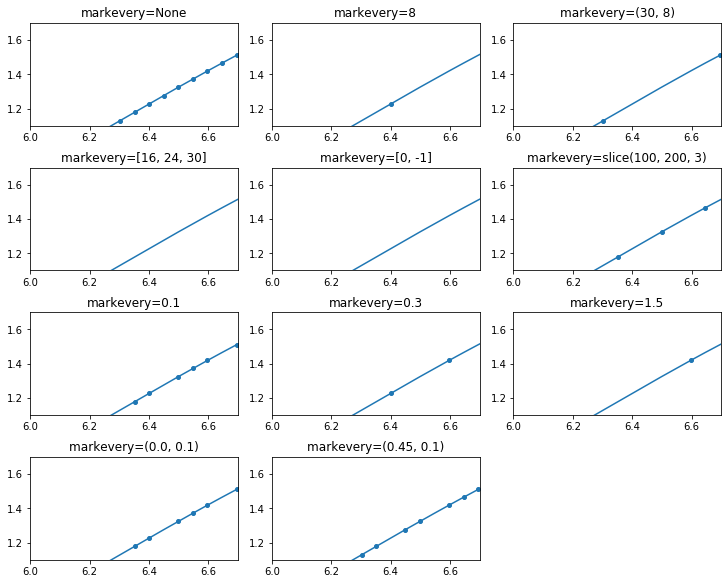

In [5]:
fig3, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)
    ax.set_xlim((6, 6.7))
    ax.set_ylim((1.1, 1.7))

# define data for polar plots
r = np.linspace(0, 3.0, 200)
theta = 2 * np.pi * r

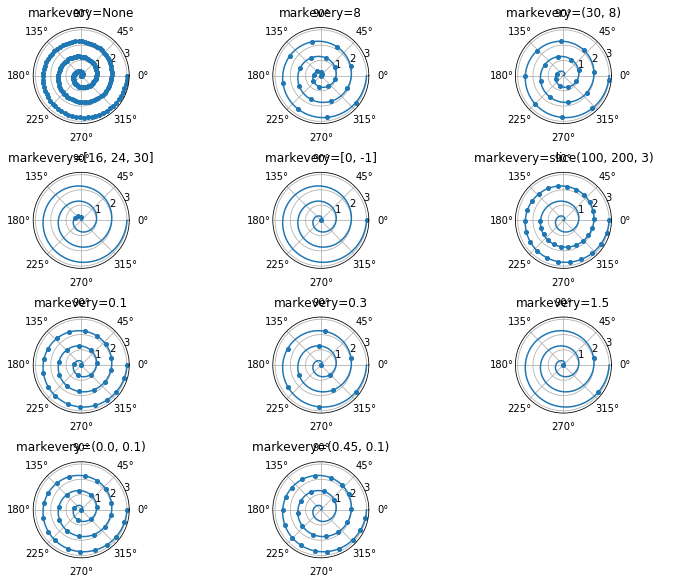

In [6]:
# Plot each markevery case for polar plots
fig4, axs = plt.subplots(rows, cols, figsize=figsize,
        subplot_kw={'projection': 'polar'}, constrained_layout=True)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(theta, r, 'o', ls='-', ms=4, markevery=case)

plt.show()